In [21]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# ───── USER CONFIG ─────────────────────────────────────────
# frequency display limits (Hz)
fmin, fmax = 0, 50e3
# ────────────────────────────────────────────────────────────

# 1) Ask user for CSV filepaths
csv_paths = []
while True:
    entry = input("Enter absolute path to a PSD CSV (or type 'done' when finished): ").strip().strip('"')
    if entry.lower() == 'done':
        if not csv_paths:
            print("⚠️ You haven't added any files yet.")
            continue
        print("\nYou have entered these files:")
        for p in csv_paths:
            print("  ", p)
        if input("Is this list correct? (y/n): ").strip().lower() == 'y':
            break
        print("Let's start over.\n")
        csv_paths.clear()
        continue

    if not os.path.exists(entry):
        print(f"  → Path does not exist: {entry}")
        continue

    csv_paths.append(entry)
    print(f"  ✅ Added: {entry}\n", flush=True)
    time.sleep(0.5)

# 2) Read each CSV and collect PSD arrays
psd_list = []
for path in csv_paths:
    df = pd.read_csv(path)
    freqs   = df.iloc[:, 0].values
    psd_vals= df.iloc[:, 1].values
    psd_list.append(psd_vals)

psd_array = np.vstack(psd_list)                 # shape = (n_trials, n_freqs)


  ✅ Added: C:\Users\sapierso\Box\PD-Acoustic Project Data\0_FormattedData\PD-acoustic165\saved_psd_100_120_nperseg_16384.csv

  ✅ Added: C:\Users\sapierso\Box\PD-Acoustic Project Data\0_FormattedData\PD-acoustic189\saved_psd_5_25_nperseg_16384.csv


You have entered these files:
   C:\Users\sapierso\Box\PD-Acoustic Project Data\0_FormattedData\PD-acoustic165\saved_psd_100_120_nperseg_16384.csv
   C:\Users\sapierso\Box\PD-Acoustic Project Data\0_FormattedData\PD-acoustic189\saved_psd_5_25_nperseg_16384.csv


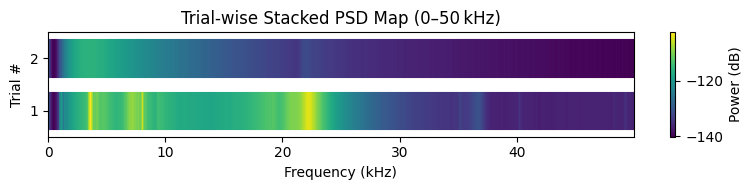

In [22]:
# ───── USER CONFIG ─────────────────────────────────────────
fmin, fmax = 0, 50e3   # frequency display limits (Hz)
# ────────────────────────────────────────────────────────────

# … (your CSV‐loading code unchanged) …

# 3) Apply frequency window
mask       = (freqs >= fmin) & (freqs <= fmax)
freqs_wind = freqs[mask]/1e3  # convert to kHz for display
psd_wind   = psd_array[:, mask]

# 4) Convert to dB
psd_db = 10 * np.log10(np.abs(psd_wind))

# 5) Plot Trial × Frequency heatmap
n_trials = psd_db.shape[0]

fig, ax = plt.subplots(figsize=(8, n_trials*1.0))
# extend the y‐axis from 0.5 to N+0.5 so each row is centered on its integer
extent = [freqs_wind[0], freqs_wind[-1], 0.5, n_trials + 0.5]

im = ax.imshow(
    psd_db,
    aspect='auto',
    origin='lower',
    interpolation='nearest',   # ← turn off smoothing
    extent=extent,
    cmap='viridis'            # or whatever you like
)

for row in range(n_trials+1):
    ax.axhline(row + 0.5, color='white', lw=10, alpha=1)


# force y‐ticks to integers only
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Trial #')
ax.set_title(f'Trial-wise Stacked PSD Map ({fmin/1e3:.0f}–{fmax/1e3:.0f} kHz)')

cbar = fig.colorbar(im, ax=ax, label='Power (dB)')
plt.tight_layout()
plt.show()


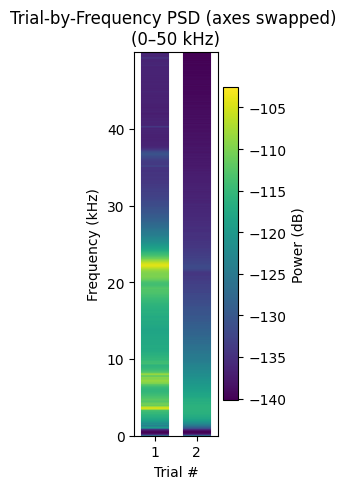

In [23]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# ───── USER CONFIG ─────────────────────────────────────────
fmin, fmax = 0, 50e3   # frequency display limits (Hz)
# ────────────────────────────────────────────────────────────

# … (your CSV‐loading code unchanged) …

# 3) Apply frequency window
mask       = (freqs >= fmin) & (freqs <= fmax)
freqs_wind = freqs[mask] / 1e3    # convert to kHz
psd_wind   = psd_array[:, mask]

# 4) Convert to dB
psd_db = 10 * np.log10(np.abs(psd_wind))

# 5) Plot with swapped axes: trial → x, freq → y
n_trials = psd_db.shape[0]
fig, ax = plt.subplots(figsize=(n_trials*1.20, 5))

# extent = [x_min, x_max, y_min, y_max]
extent = [0.5, n_trials + 0.5, freqs_wind[0], freqs_wind[-1]]

im = ax.imshow(
    psd_db.T,                  # transpose so freqs run along rows
    aspect='auto',
    origin='lower',
    interpolation='nearest',   # no smoothing
    extent=extent,
    cmap='viridis'
)

# draw vertical separators between trials
for trial in range(n_trials + 1):
    ax.axvline(trial + 0.5, color='white', lw=10, alpha=1)

# integer ticks on the trial axis
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.set_xlabel('Trial #')
ax.set_ylabel('Frequency (kHz)')
ax.set_title(f'Trial-by-Frequency PSD (axes swapped) \n({fmin/1e3:.0f}–{fmax/1e3:.0f} kHz)')

fig.colorbar(im, ax=ax, label='Power (dB)')
plt.tight_layout()
plt.show()


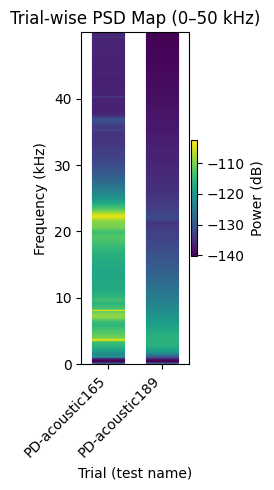

In [24]:
# … assume you already have `csv_paths`, `freqs_wind`, `psd_array` etc. …

# extract the folder name for each CSV, e.g. ".../PD-acoustic148/PD-acoustic148_...csv" → "PD-acoustic148"
folder_names = [os.path.basename(os.path.dirname(p)) for p in csv_paths]

# 4) Convert to dB
psd_db = 10 * np.log10(np.abs(psd_array[:, mask]))

# 5) Plot with swapped axes: trial → x, freq → y, and label trial ticks
n_trials = psd_db.shape[0]
fig, ax = plt.subplots(figsize=(n_trials*1.3, 5))

# extent = [x_min, x_max, y_min, y_max]
extent = [0.5, n_trials + 0.5, freqs_wind[0], freqs_wind[-1]]

im = ax.imshow(
    psd_db.T,                   # transpose so freqs run down the y-axis
    aspect='auto',
    origin='lower',
    interpolation='nearest',
    extent=extent,
    cmap='viridis'
)

# draw vertical separators between trials
for trial in range(n_trials + 1):
    ax.axvline(trial + 0.5, color='white', lw=15, alpha=1.0)

# set integer trial ticks at 1,2,...,N
ax.set_xticks(np.arange(1, n_trials+1))

# and replace them with your folder names
ax.set_xticklabels(folder_names, rotation=45, ha='right')

ax.set_xlabel('Trial (test name)')
ax.set_ylabel('Frequency (kHz)')
ax.set_title(f'Trial-wise PSD Map ({fmin/1e3:.0f}–{fmax/1e3:.0f} kHz)')

fig.colorbar(im, ax=ax, label='Power (dB)',
             pad=0.02,       # default is 0.05; smaller → less space
             fraction=0.05   # default is 0.15; smaller → slimmer bar
)
plt.tight_layout()
plt.show()


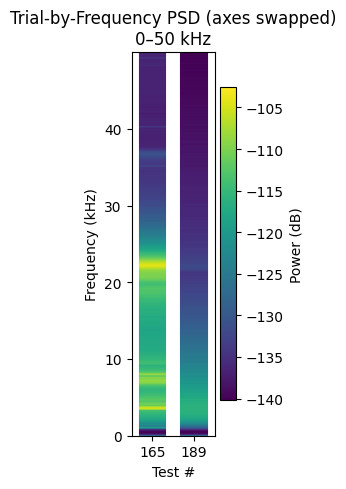

In [25]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# ───── USER CONFIG ─────────────────────────────────────────
fmin, fmax = 0, 50e3   # frequency display limits (Hz)
# ────────────────────────────────────────────────────────────

# … (your CSV‐loading code unchanged, so you have csv_paths, freqs, psd_array) …

# extract the test number from each parent folder (e.g. "PD-acoustic148" → "148")
test_ids = []
for p in csv_paths:
    folder = os.path.basename(os.path.dirname(p))
    m = re.search(r'\d+', folder)
    test_ids.append(m.group(0) if m else folder)

# 3) Apply frequency window
mask       = (freqs >= fmin) & (freqs <= fmax)
freqs_wind = freqs[mask] / 1e3    # kHz
psd_wind   = psd_array[:, mask]

# 4) Convert to dB
psd_db = 10 * np.log10(np.abs(psd_wind))

# 5) Plot with swapped axes: test # on x, frequency on y
n_trials = psd_db.shape[0]
fig, ax = plt.subplots(figsize=(n_trials*1.2, 5))

# extent = [x_min, x_max, y_min, y_max]
extent = [0.5, n_trials + 0.5, freqs_wind[0], freqs_wind[-1]]

im = ax.imshow(
    psd_db.T,
    aspect='auto',
    origin='lower',
    interpolation='nearest',
    extent=extent,
    cmap='viridis'
)

# draw vertical separators between tests
for i in range(n_trials + 1):
    ax.axvline(i + 0.5, color='white', lw=10, alpha=1.0)

# place ticks at 1,2,... and label with test IDs
ax.set_xticks(np.arange(1, n_trials + 1))
ax.set_xticklabels(test_ids)

ax.set_xlabel('Test #')
ax.set_ylabel('Frequency (kHz)')
ax.set_title(f'Trial-by-Frequency PSD (axes swapped)\n{fmin/1e3:.0f}–{fmax/1e3:.0f} kHz')

fig.colorbar(im, ax=ax, label='Power (dB)')
plt.tight_layout()
plt.show()
